In [1]:
from glob import glob
import rasterio as rio
import numpy as np
import pandas as pd
from os.path import join, exists, dirname, basename
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter

In [2]:
jpl_dic = {'lowman_23205_20002-007_20007-003_0013d_s01_L090HH_01':('2020-01-31','2020-02-13'),'lowman_23205_20007-003_20011-003_0008d_s01_L090HH_01':('2020-02-13','2020-02-21'),'lowman_23205_20011-003_20016-004_0019d_s01_L090HH_01':('2020-02-21','2020-03-11'),'lowman_23205_21009-004_21012-000_0007d_s01_L090HH_01':('2021-02-03','2021-02-10'),'lowman_23205_21017-018_21019-018_0006d_s01_L090HH_01':('2021-03-10','2021-03-16'),'lowman_23205_21015-008_21017-018_0007d_s01_L090HH_01':('2021-03-03','2021-03-10'),'lowman_23205_21019-018_21021-006_0006d_s01_L090HH_01':('2021-03-16','2021-03-22'),'lowman_23205_21004-003_21008-000_0007d_s01_L090HH_01':('','')}

def get_dates(fp):
    return jpl_dic[basename(fp).split('.')[0]]

In [3]:
in_dir = '../../../tmp/'
fig_dir = '../../figures/sd_coherence_compare/'
jpl_cor_fps = glob(join(in_dir,'*cor.grd.tiff'))
jpl_cor_sd_fps = glob(join(in_dir,'*cor.grd.clip.ma.tiff'))
jpl_unw_fps = glob(join(in_dir,'*unw.grd.tiff'))
jpl_unw_sd_fps = glob(join(in_dir,'*unw.grd.clip.ma.tiff'))
sd_fps = glob(join(in_dir, 'snow_depth*'))
dem_fps = glob(join(in_dir, 'snow_free*'))

In [4]:
with rio.open(dem_fps[0]) as src:
    dem = src.read(1)[::100,::100]
    dem = gaussian_filter(dem, 2)
    dem = np.ma.masked_where(dem<0, dem)
r = 1
for fp in jpl_cor_sd_fps:
    if fp == jpl_cor_sd_fps[0]:
        plt.figure(figsize=(12,12))
        with rio.open(fp) as src:
            cor = src.read(1)[::10,::10]
            cor = gaussian_filter(cor, 2)
        # r = pearsonr(dem[~np.isnan(dem)], cor[~np.isnan(dem)])[0]
        # print(r)
        if r > 0:
            try:
                dates = get_dates(fp)
                if pd.to_datetime(dates[0])> pd.to_datetime('2021-01-01'):
                    plt.scatter(x = dem[~np.isnan(dem)][::10], y = cor[~np.isnan(dem)][::10], alpha = 0.002)
                    plt.text(x = 0.1, y = 0.9, s = f'r = {round(r,3)}\nn = {dem[~np.isnan(dem)].size}')

                    plt.title(f'{dates[0]} to {dates[1]}')
                    plt.xlim(-0,3)
                    plt.ylim(0.2,1)
                    plt.xlabel('Snow Depth (m)')
                    plt.ylabel('Coherence')
                    plt.savefig(join(fig_dir, f'dem_cor_{dates[0]}-{dates[1]}'))
                    plt.show()
            except:
                print(fp)


../../../tmp/lowman_23205_21015-008_21017-018_0007d_s01_L090HH_01.cor.grd.clip.ma.tiff


<Figure size 864x864 with 0 Axes>

0.31809559003541654


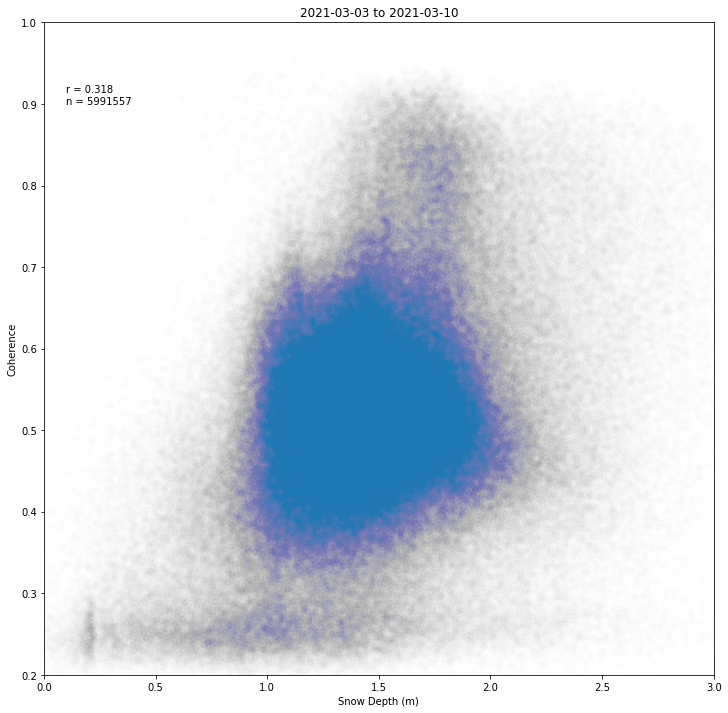

0.2222009407043175
0.14071928252784707
0.246417343288372
0.340366127827896


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

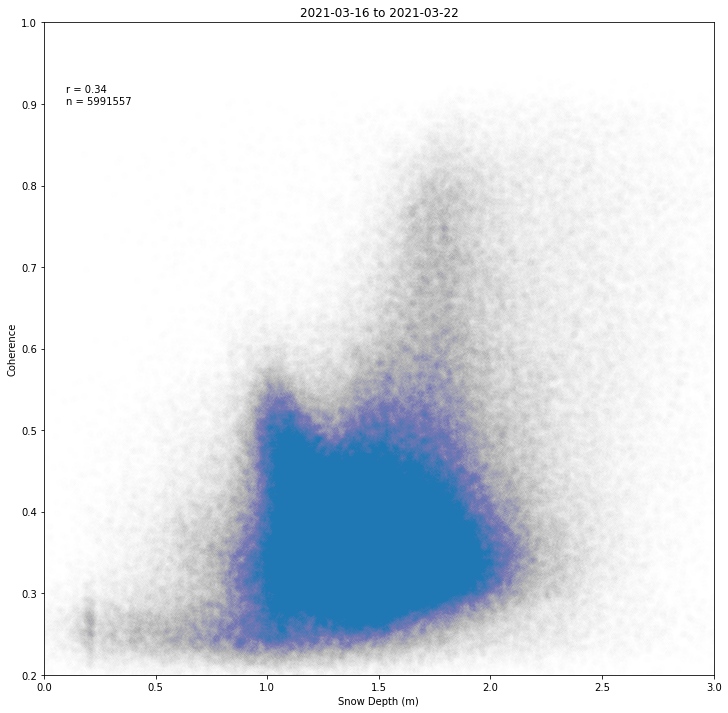

0.13137179747950564
../../../tmp/lowman_23205_21012-000_21015-008_0021d_s01_L090HH_01.cor.grd.clip.ma.tiff
0.3294957749473274
0.4277437429849428


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

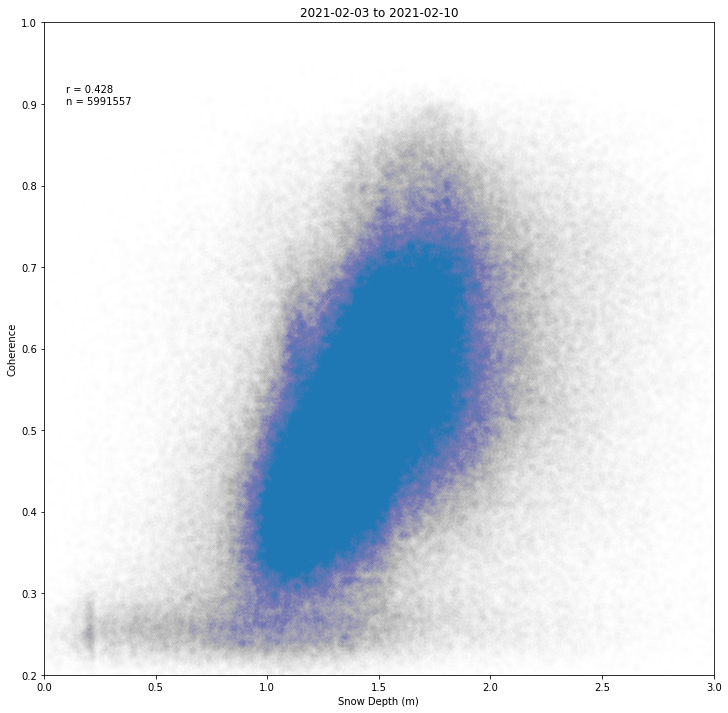

0.4286683395227954


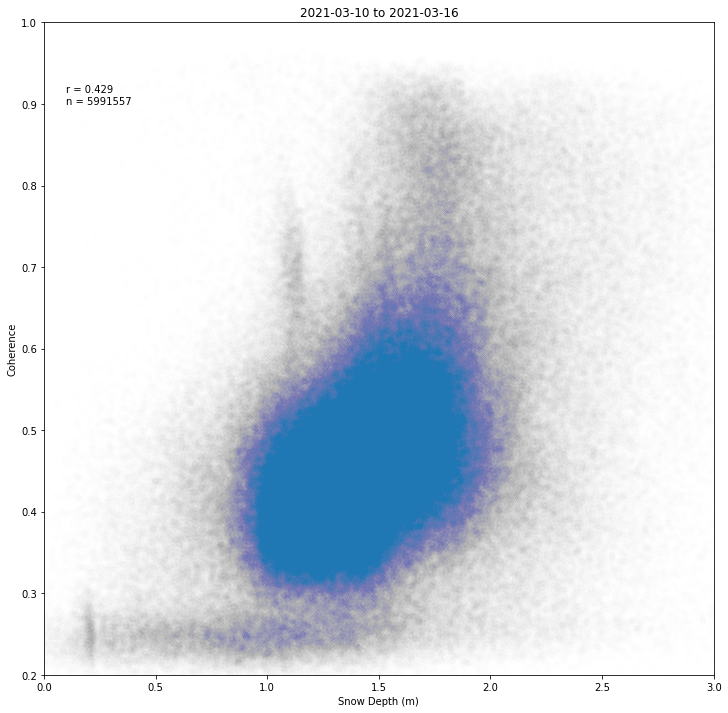

0.0611909099338311
../../../tmp/lowman_23205_19084-017_20002-007_0042d_s01_L090HH_01.cor.grd.clip.ma.tiff


<Figure size 864x864 with 0 Axes>

In [9]:
with rio.open(sd_fps[0]) as src:
    sd = src.read(1)
    sd = gaussian_filter(sd, 2)
for fp in jpl_cor_sd_fps:
    plt.figure(figsize=(12,12))
    with rio.open(fp) as src:
        cor = src.read(1)
        cor = gaussian_filter(cor, 2)
    r = pearsonr(sd[~np.isnan(sd)], cor[~np.isnan(sd)])[0]
    print(r)
    if r > 0:
        try:
            dates = get_dates(fp)
            if pd.to_datetime(dates[0])> pd.to_datetime('2021-01-01'):
                plt.scatter(x = sd[~np.isnan(sd)][::10], y = cor[~np.isnan(sd)][::10], alpha = 0.002)
                plt.text(x = 0.1, y = 0.9, s = f'r = {round(r,3)}\nn = {sd[~np.isnan(sd)].size}')

                plt.title(f'{dates[0]} to {dates[1]}')
                plt.xlim(-0,3)
                plt.ylim(0.2,1)
                plt.xlabel('Snow Depth (m)')
                plt.ylabel('Coherence')
                plt.savefig(join(fig_dir, f'sd_cor_{dates[0]}-{dates[1]}'))
                plt.show()
        except:
            print(fp)


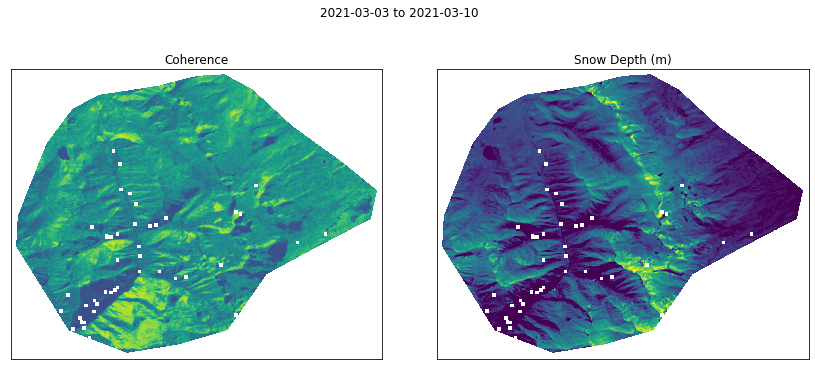

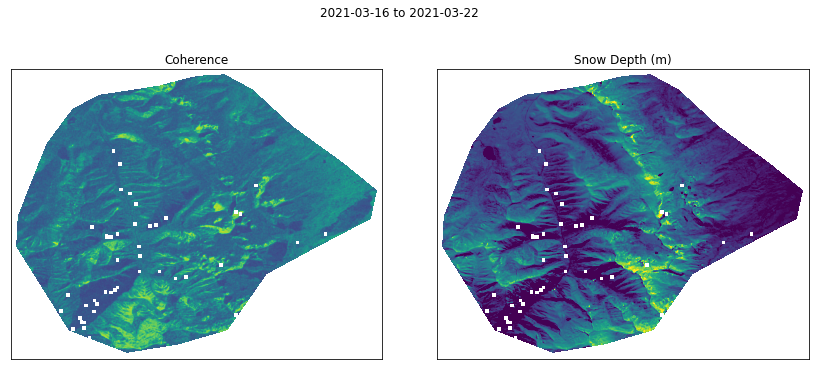

../../../tmp/lowman_23205_21012-000_21015-008_0021d_s01_L090HH_01.cor.grd.clip.ma.tiff


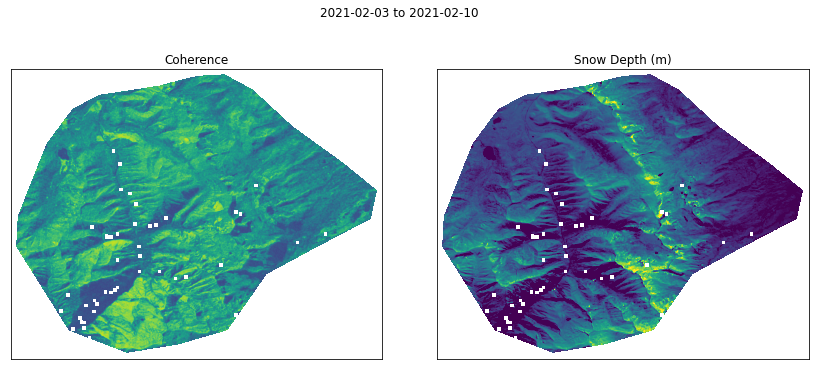

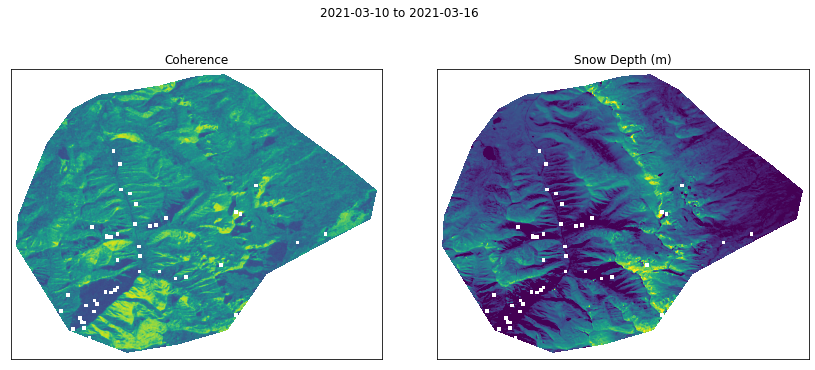

../../../tmp/lowman_23205_19084-017_20002-007_0042d_s01_L090HH_01.cor.grd.clip.ma.tiff


In [11]:
with rio.open(sd_fps[0]) as src:
    sd = src.read(1)
    sd = gaussian_filter(sd, 2)
for fp in jpl_cor_sd_fps:
    with rio.open(fp) as src:
        cor = src.read(1)
        cor = gaussian_filter(cor, 2)
    r = pearsonr(sd[~np.isnan(sd)], cor[~np.isnan(sd)])[0]
    # print(r)
    if r > 0:
        try:
            dates = get_dates(fp)
            if pd.to_datetime(dates[0])> pd.to_datetime('2021-01-01'):
                f, axs = plt.subplots(1,2,figsize=(12,6))
                axs[0].imshow(cor, vmin = 0, vmax = 1)
                axs[0].set_title('Coherence')
                axs[1].imshow(sd, vmin = 1, vmax = 3)
                axs[1].set_title('Snow Depth (m)')
                f.tight_layout()
                f.suptitle(f'{dates[0]} to {dates[1]}')
                for ax in axs:
                    ax.axes.xaxis.set_visible(False)
                    ax.axes.yaxis.set_visible(False)
                plt.savefig(join(fig_dir, f'sd_cor_images_{dates[0]}-{dates[1]}'))

                plt.show()
        except:
            print(fp)


In [19]:
with rio.open(dem_fps[0]) as src:
    sd = src.read(1)
    sd = gaussian_filter(sd, 2)
for fp in jpl_cor_sd_fps:
    with rio.open(fp) as src:
        cor = src.read(1)
        cor = gaussian_filter(cor, 2)
    r = pearsonr(sd[~np.isnan(sd)], cor[~np.isnan(sd)])[0]
    # print(r)
    if r > 0:
        try:
            dates = get_dates(fp)
            if pd.to_datetime(dates[0])> pd.to_datetime('2021-01-01'):
                f, axs = plt.subplots(1,2,figsize=(12,6))
                axs[0].imshow(cor, vmin = 0, vmax = 1)
                axs[0].set_title('Coherence')
                axs[1].imshow(sd, vmin = 1, vmax = 3)
                axs[1].set_title('Elevation (m)')
                f.tight_layout()
                f.suptitle(f'{dates[0]} to {dates[1]}')
                for ax in axs:
                    ax.axes.xaxis.set_visible(False)
                    ax.axes.yaxis.set_visible(False)
                plt.savefig(join(fig_dir, f'sd_cor_images_{dates[0]}-{dates[1]}'))

                plt.show()
        except:
            print(fp)
